## Interest Rate Prediction 

We would like to use lending club loans data to explore how the interest rate charged on loans depend upon various factors.

#### Objective:

We need to predict interest rates based on borrower and loan attributes.

In [1]:
# importing libraries for data manipulation, plotting

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# importing libraries for stats modeling

import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

### Pre-modeling step (Data audit report)

In [3]:
data = pd.read_csv('E:/asubudhi/class/Class_3/3. Peer Group Lending - Predicting Intrest Rates/LoansData.csv')
data.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [4]:
data.describe()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2500.00000,2499.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000
mean,1250.50000,12405.462185,12002.374186,5688.931321,10.072887,15223.184622,0.906688
std,721.83216,7802.933666,7746.767348,3963.118185,4.507416,18281.015258,1.231149
min,1.00000,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,625.75000,6000.000000,6000.000000,3500.000000,7.000000,5584.000000,0.000000
50%,1250.50000,10000.000000,10000.000000,5000.000000,9.000000,10948.000000,0.000000
75%,1875.25000,17000.000000,16000.000000,6800.000000,13.000000,18861.000000,1.000000
max,2500.00000,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
LoanID                            2500 non-null int64
Amount.Requested                  2499 non-null float64
Amount.Funded.By.Investors        2499 non-null float64
Interest.Rate                     2498 non-null object
Loan.Length                       2500 non-null object
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2499 non-null object
State                             2500 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2498 non-null object
Open.CREDIT.Lines                 2497 non-null float64
Revolving.CREDIT.Balance          2497 non-null float64
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2423 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 293.1+ KB

In [18]:
# To have the complete data audit report instead of using individual functions, we use pandas_profiling.
# The result is saved in a html file named ''

Pandas_profiling.ProfileReporting(data).to_file('Interest_Rate_Data_Audit_Report.html')

### 2 . Modeling
#### Data preparation step-1( addressing the issues found in data audit report)

In [6]:
# 1. Renaming the variable.

s = []
for i in data.columns:
    x = i.replace('.','_')
    s.append(x)

In [7]:
data.columns = s
data.columns

Index(['LoanID', 'Amount_Requested', 'Amount_Funded_By_Investors',
       'Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio',
       'State', 'Home_Ownership', 'Monthly_Income', 'FICO_Range',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

In [8]:
# 2. Removing special character which leads to wrong interpretation of data type.

data['Interest_Rate'] = data['Interest_Rate'].replace('%','',regex = True)
data['Debt_To_Income_Ratio'] = data['Debt_To_Income_Ratio'].replace('%','',regex = True)
data['Loan_Length'] = data['Loan_Length'].replace('months','',regex = True)

In [9]:
data.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [10]:
data['Employment_Length'] = data['Employment_Length'].str.replace('<','',regex = True)
data['Employment_Length'] = data['Employment_Length'].str.replace('+','',regex = True)
data['Employment_Length'] = data['Employment_Length'].str.replace('years','',regex = True)
data['Employment_Length'] = data['Employment_Length'].str.replace('year','',regex = True)

In [11]:
data.head()

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,1,20000.0,20000.0,8.90,36,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1
1,2,19200.0,19200.0,12.12,36,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2
2,3,35000.0,35000.0,21.98,60,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2
3,4,10000.0,9975.0,9.99,36,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5
4,5,12000.0,12000.0,11.71,36,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9


In [12]:
a = data.FICO_Range.str.split('-',expand = True)[0].astype(float)
b = data.FICO_Range.str.split('-',expand = True)[1].astype(float)
data['ficoavg'] = (a+b)/2

In [13]:
# 3. converting the wrongly interpreted data types into correct data type.

data['Interest_Rate'] = data['Interest_Rate'].astype(float)
data['Debt_To_Income_Ratio'] = data['Debt_To_Income_Ratio'].astype(float)
data['Loan_Length'] = data['Loan_Length'].astype(float)
data['Employment_Length'] = data['Employment_Length'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
LoanID                            2500 non-null int64
Amount_Requested                  2499 non-null float64
Amount_Funded_By_Investors        2499 non-null float64
Interest_Rate                     2498 non-null float64
Loan_Length                       2500 non-null float64
Loan_Purpose                      2500 non-null object
Debt_To_Income_Ratio              2499 non-null float64
State                             2500 non-null object
Home_Ownership                    2499 non-null object
Monthly_Income                    2499 non-null float64
FICO_Range                        2498 non-null object
Open_CREDIT_Lines                 2497 non-null float64
Revolving_CREDIT_Balance          2497 non-null float64
Inquiries_in_the_Last_6_Months    2497 non-null float64
Employment_Length                 2423 non-null float64
ficoavg                           2498 non-null float64
dty

In [14]:
# 4. Drop the variables which are not necessary (variables having unique value etc.).

data.drop(['LoanID','Amount_Funded_By_Investors','State','FICO_Range'], axis = 1, inplace = True)

In [15]:
# 5. Converting nominal categorical variables into continous variables

dummy_var = pd.get_dummies(data[['Loan_Purpose','Home_Ownership']],drop_first = True)
data_new = pd.concat([data,dummy_var], axis=1)

In [16]:
# After convertion drop the original categorical variables.

data_new.drop(['Loan_Purpose', 'Home_Ownership'], axis=1, inplace=True)

In [17]:
# 6. Outliers detection and treatment

def outliers_treat(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [18]:
data_new = data_new.apply(outliers_treat)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  after removing the cwd from sys.path.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  """


In [19]:
# 7. Missing Values detection and Treatment

data_new.apply(lambda x: sum(x.isnull()))

Amount_Requested                    1
Interest_Rate                       2
Loan_Length                         0
Debt_To_Income_Ratio                1
Monthly_Income                      1
Open_CREDIT_Lines                   3
Revolving_CREDIT_Balance            3
Inquiries_in_the_Last_6_Months      3
Employment_Length                  77
ficoavg                             2
Loan_Purpose_credit_card            0
Loan_Purpose_debt_consolidation     0
Loan_Purpose_educational            0
Loan_Purpose_home_improvement       0
Loan_Purpose_house                  0
Loan_Purpose_major_purchase         0
Loan_Purpose_medical                0
Loan_Purpose_moving                 0
Loan_Purpose_other                  0
Loan_Purpose_renewable_energy       0
Loan_Purpose_small_business         0
Loan_Purpose_vacation               0
Loan_Purpose_wedding                0
Home_Ownership_NONE                 0
Home_Ownership_OTHER                0
Home_Ownership_OWN                  0
Home_Ownersh

In [20]:
# Based on missing values(77 out of 2500) in employment length column we can drop that column
data_new.drop(['Employment_Length'], axis = 1, inplace = True)

In [21]:
def missing_treat(x):
    x = x.fillna(x.median())
    return x

In [22]:
data_new = data_new.apply(missing_treat)

In [23]:
data_new.apply(lambda x: sum(x.isnull()))

Amount_Requested                   0
Interest_Rate                      0
Loan_Length                        0
Debt_To_Income_Ratio               0
Monthly_Income                     0
Open_CREDIT_Lines                  0
Revolving_CREDIT_Balance           0
Inquiries_in_the_Last_6_Months     0
ficoavg                            0
Loan_Purpose_credit_card           0
Loan_Purpose_debt_consolidation    0
Loan_Purpose_educational           0
Loan_Purpose_home_improvement      0
Loan_Purpose_house                 0
Loan_Purpose_major_purchase        0
Loan_Purpose_medical               0
Loan_Purpose_moving                0
Loan_Purpose_other                 0
Loan_Purpose_renewable_energy      0
Loan_Purpose_small_business        0
Loan_Purpose_vacation              0
Loan_Purpose_wedding               0
Home_Ownership_NONE                0
Home_Ownership_OTHER               0
Home_Ownership_OWN                 0
Home_Ownership_RENT                0
dtype: int64

In [24]:
# 8. Remove variable based on coefficient of variance of the variables. if (cv < 0.1)
data_new.drop(['Loan_Purpose_educational','Home_Ownership_OTHER','Home_Ownership_NONE','Loan_Purpose_vacation','Loan_Purpose_renewable_energy','Loan_Purpose_house'],axis = 1, inplace = True)

In [25]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
Amount_Requested                   2500 non-null float64
Interest_Rate                      2500 non-null float64
Loan_Length                        2500 non-null float64
Debt_To_Income_Ratio               2500 non-null float64
Monthly_Income                     2500 non-null float64
Open_CREDIT_Lines                  2500 non-null float64
Revolving_CREDIT_Balance           2500 non-null float64
Inquiries_in_the_Last_6_Months     2500 non-null float64
ficoavg                            2500 non-null float64
Loan_Purpose_credit_card           2500 non-null uint8
Loan_Purpose_debt_consolidation    2500 non-null uint8
Loan_Purpose_home_improvement      2500 non-null uint8
Loan_Purpose_major_purchase        2500 non-null uint8
Loan_Purpose_medical               2500 non-null uint8
Loan_Purpose_moving                2500 non-null uint8
Loan_Purpose_other                 2500 non-null u

#### Moving to data preparation part 2 (checking the assumption of the techniques - here it is linear regression technique)

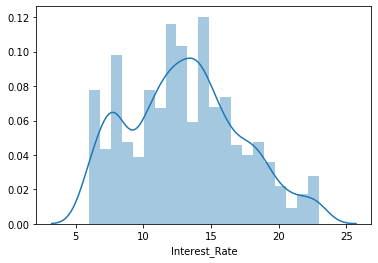

In [26]:
# 1. Normality (Y - variable/ dependable variable is normally distributed)

import seaborn as sns
sns.distplot(data_new.Interest_Rate)

In [27]:
ln_Interest_Rate = np.log(data_new.Interest_Rate)

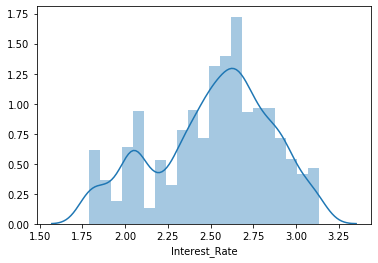

In [28]:
sns.distplot(ln_Interest_Rate)

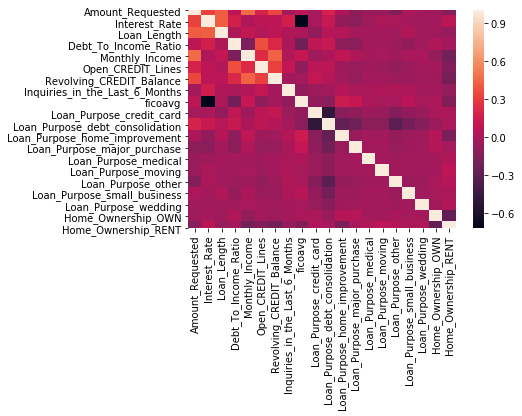

In [30]:
# 2. Linearity (relationship between y and x variable should be linear)
# The result is saved in a csv file name 'Interest_Rate_Correlation.csv'.

corr_matrix = data_new.corr()
corr_matrix.to_csv('Interest_Rate_Correlation.csv')
sns.heatmap(corr_matrix)

In [31]:
#Based on correlation metrics and correlation between Y & X, the below variables can be considered
#feature is a dataframe
features = data_new[['Amount_Requested', 'Loan_Length', 'Debt_To_Income_Ratio', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months', 'ficoavg', 'Loan_Purpose_debt_consolidation', 'Loan_Purpose_home_improvement', 'Loan_Purpose_major_purchase']]

In [32]:
# Target is also a dataframe
target = data_new[['Interest_Rate']]

In [33]:
# 3. Multicollinearity (checks if there is relationship among x variables)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["features"] = features.columns

In [34]:
vif

,VIF Factor,features
0,5.036991,Amount_Requested
1,21.352880,Loan_Length
2,6.158677,Debt_To_Income_Ratio
3,7.950127,Open_CREDIT_Lines
4,2.501806,Revolving_CREDIT_Balance
5,1.630271,Inquiries_in_the_Last_6_Months
6,23.497865,ficoavg
7,2.481623,Loan_Purpose_debt_consolidation
8,1.187172,Loan_Purpose_home_improvement
9,1.129724,Loan_Purpose_major_purchase


In [35]:
# Based on VIF(Multicollinearity check) we can drop Open_CREDIT_Lines variable but not Loan_length and ficoavg because they have more correlation values with interest rate
features.drop(['Open_CREDIT_Lines'], axis = 1, inplace = True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["features"] = features.columns
vif

,VIF Factor,features
0,4.994569,Amount_Requested
1,21.347870,Loan_Length
2,5.437426,Debt_To_Income_Ratio
3,2.385189,Revolving_CREDIT_Balance
4,1.602640,Inquiries_in_the_Last_6_Months
5,21.707124,ficoavg
6,2.479464,Loan_Purpose_debt_consolidation
7,1.187172,Loan_Purpose_home_improvement
8,1.129667,Loan_Purpose_major_purchase


In [37]:
features.drop(['Debt_To_Income_Ratio'], axis = 1, inplace = True)

In [38]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["features"] = features.columns
vif

,VIF Factor,features
0,4.989693,Amount_Requested
1,21.261084,Loan_Length
2,2.277838,Revolving_CREDIT_Balance
3,1.600594,Inquiries_in_the_Last_6_Months
4,19.353965,ficoavg
5,2.458164,Loan_Purpose_debt_consolidation
6,1.179603,Loan_Purpose_home_improvement
7,1.121188,Loan_Purpose_major_purchase


In [39]:
features.drop(['Loan_Length'], axis = 1, inplace = True)

In [40]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["features"] = features.columns
vif

,VIF Factor,features
0,4.228138,Amount_Requested
1,2.271051,Revolving_CREDIT_Balance
2,1.593553,Inquiries_in_the_Last_6_Months
3,5.569837,ficoavg
4,2.457070,Loan_Purpose_debt_consolidation
5,1.178986,Loan_Purpose_home_improvement
6,1.121029,Loan_Purpose_major_purchase


In [41]:
features.drop(['Amount_Requested'], axis = 1, inplace = True)

In [42]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["features"] = features.columns
vif

,VIF Factor,features
0,2.010587,Revolving_CREDIT_Balance
1,1.593172,Inquiries_in_the_Last_6_Months
2,4.187310,ficoavg
3,2.370484,Loan_Purpose_debt_consolidation
4,1.172954,Loan_Purpose_home_improvement
5,1.117729,Loan_Purpose_major_purchase


#### Data preparation step - 3 (feature engineering/ feature reduction/ feature selection)

- The number of features are less in number, thus we wont perform this step.
- But we can see one the feature selection step that is f_regression.

In [43]:
from sklearn.feature_selection import f_regression

In [44]:
# F Regression(doing regression for each variable, which ever variable is having higher relation, select them).
# From this we can see why we did not remove 'ficoavg' at the start, even after we saw it is having vif value > 5.  

F_values, P_values = f_regression(features,target)
f_regression_results = pd.concat([pd.Series(features.columns),pd.Series(F_values),pd.Series(P_values)], axis = 1)
f_regression_results.columns = ['feature','F_value','P_value']
f_regression_results.sort_values('F_value', ascending = False)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,feature,F_value,P_value
2,ficoavg,2568.482208,0.000000e+00
1,Inquiries_in_the_Last_6_Months,74.708773,9.572824e-18
3,Loan_Purpose_debt_consolidation,43.076043,6.380195e-11
5,Loan_Purpose_major_purchase,31.493787,2.221466e-08
4,Loan_Purpose_home_improvement,19.791890,9.013078e-06
0,Revolving_CREDIT_Balance,17.585776,2.842029e-05


In [45]:
# Due to less amount of x variable available, we can skip the feature reduction step and move on. 

#### Data preparation step - 4

In [46]:
# split the data into test and train data

data_final = pd.concat([features,target], axis = 1)

In [47]:
train,test = train_test_split(data_final, test_size = 0.3, random_state = 121)

#### Model building

In [48]:
formula = 'Interest_Rate ~' + '+'.join(features.columns)
formula

'Interest_Rate ~Revolving_CREDIT_Balance+Inquiries_in_the_Last_6_Months+ficoavg+Loan_Purpose_debt_consolidation+Loan_Purpose_home_improvement+Loan_Purpose_major_purchase'

In [49]:
lr_model = smf.ols('Interest_Rate ~Revolving_CREDIT_Balance+Inquiries_in_the_Last_6_Months+ficoavg+Loan_Purpose_debt_consolidation+Loan_Purpose_home_improvement+Loan_Purpose_major_purchase', data = train)

In [50]:
lr_model = lr_model.fit()

In [51]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Interest_Rate   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     329.8
Date:                Wed, 05 Aug 2020   Prob (F-statistic):          7.82e-283
Time:                        18:39:54   Log-Likelihood:                -4323.5
No. Observations:                1750   AIC:                             8661.
Df Residuals:                    1743   BIC:                             8699.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [52]:
# As the p-value for variable 'Loan_Purpose_major_purchase' is higher than (.05) we will drop that variable and again re run the model.

lr_model = smf.ols('Interest_Rate ~Revolving_CREDIT_Balance+Inquiries_in_the_Last_6_Months+ficoavg+Loan_Purpose_debt_consolidation+Loan_Purpose_home_improvement', data = train)

In [53]:
lr_model = lr_model.fit()

In [54]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Interest_Rate   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     396.0
Date:                Wed, 05 Aug 2020   Prob (F-statistic):          3.75e-284
Time:                        18:39:55   Log-Likelihood:                -4323.5
No. Observations:                1750   AIC:                             8659.
Df Residuals:                    1744   BIC:                             8692.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [55]:
# Final equation:
# Interest_Rate = 0.00002143 * Revolving_CREDIT_Balance+ 0.3983*Inquiries_in_the_Last_6_Months- 0.0846*ficoavg+ 0.5117*Loan_Purpose_debt_consolidation+ 0.6095*Loan_Purpose_home_improvement

In [56]:
train['Pred'] = lr_model.predict(train)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
test['Pred'] = lr_model.predict(test)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
train.head()

,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,ficoavg,Loan_Purpose_debt_consolidation,Loan_Purpose_home_improvement,Loan_Purpose_major_purchase,Interest_Rate,Pred
1992,6913.0,0.0,712.0,1,0,0,10.16,12.430168
998,5624.0,0.0,697.0,0,1,0,16.32,13.769227
2364,13205.0,0.0,667.0,1,0,0,18.25,16.371585
2215,33189.0,0.0,712.0,1,0,0,7.90,12.993169
226,28703.0,2.0,712.0,0,0,1,12.12,13.182049


In [59]:
# Calculating the error matrices for train data

train_MAPE =(np.mean(np.abs(train.Interest_Rate - train.Pred)/train.Interest_Rate))*100
train_RMSE =np.mean(np.square(train.Interest_Rate - train.Pred))
train_RMSPE =(np.mean(np.square((train.Interest_Rate - train.Pred)/train.Interest_Rate)))*100
train_corr = np.corrcoef(train.Interest_Rate, train.Pred)[1][0]
print('The Mean Absolute Percentage Error for train data is',train_MAPE)
print('The Root Mean Square Error for train data is',train_RMSE)
print('The Root Mean Square Percentage Error is',train_RMSPE)
print('The correlation between actual and Predicted house prize is',train_corr)

The Mean Absolute Percentage Error for train data is 19.03859003359125
The Root Mean Square Error for train data is 8.193152968389601
The Root Mean Square Percentage Error is 5.995070799499608
The correlation between actual and Predicted house prize is 0.7291781538386082


In [60]:
test_MAPE =(np.mean(np.abs(test.Interest_Rate - test.Pred)/test.Interest_Rate))*100
test_RMSE =np.mean(np.square(test.Interest_Rate - test.Pred))
test_RMSPE =(np.mean(np.square((test.Interest_Rate - test.Pred)/test.Interest_Rate)))*100
test_corr = np.corrcoef(test.Interest_Rate, test.Pred)[1][0]
print('The Mean Absolute Percentage Error for train data is',test_MAPE)
print('The Root Mean Square Error for train data is',test_RMSE)
print('The Root Mean Square Percentage Error is',test_RMSPE)
print('The correlation between actual and Predicted house prize is',test_corr)

The Mean Absolute Percentage Error for train data is 19.98083518459673
The Root Mean Square Error for train data is 7.98418803602933
The Root Mean Square Percentage Error is 6.664610317872715
The correlation between actual and Predicted house prize is 0.7194047218437697


#### Decile Analysis

Decile analysis is a ranking analysis, where on the basis of independent/target variable the dataset is divided into 10 groups. Each group is given a rank, highest is 9 and lowest is 0.We can do the avearage or the sum of the values of a group.

Following are the characteristics of good model/the model is stable :

#1. If the higher rank decile is having higer value and lower rank decile has lower value for both actual and predicted, then we will say our each rank is predicted properly.

#2. The decrease of value from higher rank to lower rank should be linear

In [61]:
# For training data
train['Deciles']=pd.qcut(train['Pred'],10, labels=False)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
# Calculating the mean of the deciles

avg_actual = train[['Deciles','Interest_Rate']].groupby(train.Deciles).mean().sort_index(ascending = False)['Interest_Rate']
avg_pred = train[['Deciles','Pred']].groupby(train.Deciles).mean().sort_index(ascending = False)['Pred']
decile_analysis_train = pd.concat([avg_actual,avg_pred], axis = 1)
decile_analysis_train

,Interest_Rate,Pred
Deciles,,
9,17.700105,17.095979
8,16.548855,16.124721
7,15.764227,15.519510
6,14.830171,14.750513
5,14.199257,14.017762
4,12.941829,13.261923
3,11.373486,12.352487
2,10.559429,11.303625
1,9.267360,9.676509


In [63]:
# For test data
# Calculating the mean of the deciles

test['Deciles']=pd.qcut(test['Pred'],10, labels=False)
avg_actual = test[['Deciles','Interest_Rate']].groupby(test.Deciles).mean().sort_index(ascending = False)['Interest_Rate']
avg_pred = test[['Deciles','Pred']].groupby(test.Deciles).mean().sort_index(ascending = False)['Pred']
decile_analysis_test = pd.concat([avg_actual,avg_pred], axis = 1)
decile_analysis_test

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Interest_Rate,Pred
Deciles,,
9,17.358932,17.143408
8,16.821731,16.211921
7,15.814400,15.497935
6,14.520533,14.751884
5,14.247333,13.960145
4,12.587867,13.229157
3,10.665067,12.335437
2,10.660453,11.295595
1,8.691493,9.720153


- We can see that the values are in linear decreasing order for both actual and pred which means each group is predicted well.
- Secondly, comparing the avg value of both actual and pred. we saw the group with high values are predicted well in comparision to the group with lower average values.
- The test accuracy and train accuracy are nearly equal, showing the sign of a stable model.
- The MAPE is around 20%, thus the model can be further improve with additional significant features.